![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

## Import Packages and Data

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data
flights = pd.read_csv("flights2022.csv")
weather = pd.read_csv("flights_weather2022.csv")

### Review the data

In [3]:
# flights data
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [5]:
# check the structure of the data
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

In [6]:
# weather data - same thing here, check the structure and look of the data
weather.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

### Task 1

For routes, calculate the average departure delays and highest number of canceled flights.

In [8]:
# join the origin and dest columms to create route
flights['route'] = flights['origin'] + '-' + flights['dest']
flights['route'].head()

0    SEA-IAH
1    SEA-FAI
2    SEA-ATL
3    SEA-ORD
4    PDX-ORD
Name: route, dtype: object

In [10]:
# where dep_time is null = cancelled flight
flights['cancelled'] = np.where(flights['dep_time'].isnull(), 1, 0)

# calculated the aggregated values
routes_delays_cancels  = flights.groupby('route').agg({'dep_delay':'mean', 'cancelled':'sum'}).reset_index()

# rename the column for cancellations
routes_delays_cancels.rename(columns={'cancelled':'total_cancellations'}, inplace=True)
routes_delays_cancels.head()

,route,dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7


### Task 2

For airlines, determine the average departure delays and the highest number of canceled flights.

In [11]:
# same as before, but the grouping variable is now airlines
# first, let's check the airline names are correct

flights['airline'].unique()

array(['United Air Lines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'American Airlines Inc.', 'Horizon Air', 'Southwest Airlines Co.',
       'Delta Air Lines Inc.', 'SkyWest Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Spirit Air Lines',
       'Frontier Airlines Inc.', 'Allegiant Air'], dtype=object)

In [12]:
# repeat previous steps
# group by and aggregate
airlines_delays_cancels = flights.groupby('airline').agg({'dep_delay':'mean', 'cancelled':'sum'}).reset_index()

# view dataframe
airlines_delays_cancels

,airline,dep_delay,cancelled
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12
5,Hawaiian Airlines Inc.,8.186207,4
6,Horizon Air,6.270965,238
7,JetBlue Airways,42.141524,33
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100


### Task 3

Produce two bar graphs...  
1. The top 9 highest number of cancellations by route in a plot called `top9_route_cancels_bar`  
2. The top 9 highest average departure delays by airline in a plot called `top9_airline_delays_bar`

In [13]:
# produce bar chart 1
# top route cancels - filter for the top 9
top_9_routes_delays_cancels = routes_delays_cancels .sort_values('total_cancellations', ascending=False).iloc[0:9, :]

C:\Users\Alexander\AppData\Local\Temp\ipykernel_54228\3324864469.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_9_routes_delays_cancels['route'], rotation=45)


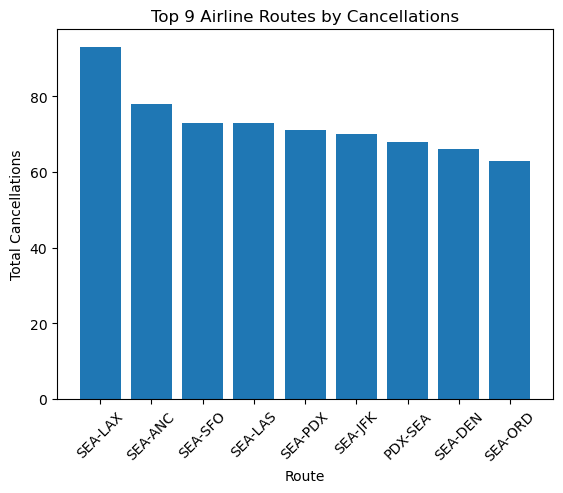

In [14]:
# bar graph for number of cancellations by route

top_9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_9_routes_delays_cancels['route'], top_9_routes_delays_cancels['total_cancellations'])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Top 9 Airline Routes by Cancellations")
ax.set_xticklabels(top_9_routes_delays_cancels['route'], rotation=45)
plt.show()

In [15]:
# produce bar chart 2
# number of airline delays
top_9_airlines_delays = airlines_delays_cancels.sort_values('dep_delay', ascending=False).iloc[0:9, :]

C:\Users\Alexander\AppData\Local\Temp\ipykernel_54228\3983122248.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_9_airlines_delays['airline'])


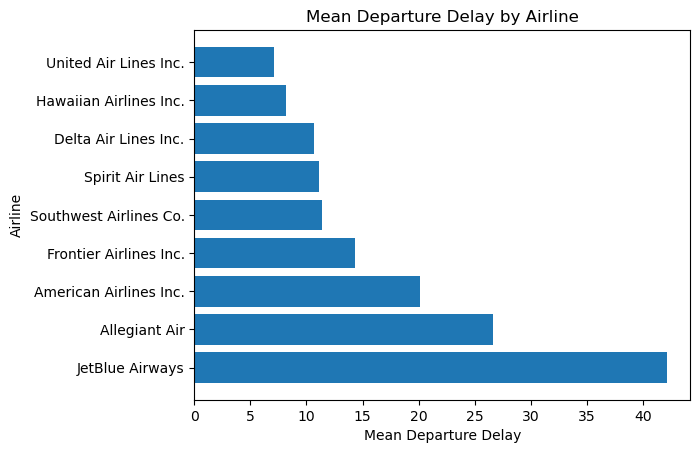

In [19]:
# bar plot for top cancellations by airline
top9_airline_delays_bar, ax = plt.subplots()
ax.barh(top_9_airlines_delays['airline'], top_9_airlines_delays['dep_delay'])
ax.set_xlabel("Mean Departure Delay")
ax.set_ylabel("Airline")
ax.set_yticklabels(top_9_airlines_delays['airline'])
ax.set_title("Mean Departure Delay by Airline")
plt.show()

### Task 4

Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX

In [20]:
# find the data for those two origins first
flights_sea_pdx = weather[(weather['origin'] == "SEA") | (weather['origin'] == "PDX")]

# filter for wind gusts >= 10 mph
flights_sea_pdx_gust10 = flights_sea_pdx[flights_sea_pdx['wind_gust'] >= 10]

# filter for wind gusts < 10 mph
flights_sea_pdx_gustlow = flights_sea_pdx[flights_sea_pdx['wind_gust'] < 10]

flights_sea_pdx_gustlow.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,...,PDX-JFK,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [32]:
# calculate the avg dep delay for both datasets
gust_dep_delay_drop = flights_sea_pdx_gust10['wind_gust'].dropna()
gust_dep_delay = gust_dep_delay_drop.mean()
lowgust_dep_delay_drop = flights_sea_pdx_gustlow['wind_gust'].dropna()
lowgust_dep_delay = lowgust_dep_delay_drop.mean()

if gust_dep_delay > lowgust_dep_delay:
    wind_response = True
else:
    wind_response = False
    
print(f"A departure delay exists when the gust is 10mph or greater: {wind_response}")

A departure delay exists when the gust is 10mph or greater: True


In [35]:
# let's determine if that difference is statistically significant
from scipy import stats

t_statistic, p_value = stats.ttest_ind(gust_dep_delay_drop, lowgust_dep_delay_drop)

In [36]:
# final statement
alpha = 0.05

if p_value < 0.05:
    print(f"We reject the null hypothesis that the mean departure delay is the same between the two groups. The p-value is {p_value.round(3)}, and this suggests on days where gusts are stronger than 10mph, departure delay is significantly greater.")
else:
    print("We fail to reject the null hypothesis. The mean departure delay is the same on days with gusts at or greater than 10mph, to days where wind gusts are less than 10mph.")


We reject the null hypothesis that the mean departure delay is the same between the two groups. The p-value is 0.0, and this suggests on days where gusts are stronger than 10mph, departure delay is significantly greater.
